In [1]:
import pyspark.sql.functions as fn

In [2]:
df = spark.read.csv('/FileStore/tables/crime.csv', header=True)

# cast data types, everything is imported as string
df = df.withColumn('OFFENSE_CODE', df['OFFENSE_CODE'].cast("int"))
df = df.withColumn('REPORTING_AREA', df['REPORTING_AREA'].cast("int"))
df = df.withColumn('YEAR', df['YEAR'].cast("string"))
df = df.withColumn('MONTH', df['MONTH'].cast("int"))
df = df.withColumn('HOUR', df['HOUR'].cast("int"))
df = df.withColumn('Lat', df['Lat'].cast("float"))
df = df.withColumn('Long', df['Long'].cast("float"))
df = df.withColumn('OCCURRED_ON_DATE', df['OCCURRED_ON_DATE'].cast("date"))


df = df.withColumn('Shoot_clean', fn.when(fn.col('Shooting').isNull(), 0).otherwise(fn.lit(1)))
df= df.withColumn('Shoot_clean', df['Shoot_clean'].cast("int"))
df = df.withColumn('Lat_clean', fn.when(df['Lat'] == -1, None).otherwise(df['Lat']))
df = df.withColumn('Long_clean', fn.when(df['Long'] == -1, None).otherwise(df['Long']))
#df.show()
df.printSchema()

root
-- INCIDENT_NUMBER: string (nullable = true)
-- OFFENSE_CODE: integer (nullable = true)
-- OFFENSE_CODE_GROUP: string (nullable = true)
-- OFFENSE_DESCRIPTION: string (nullable = true)
-- DISTRICT: string (nullable = true)
-- REPORTING_AREA: integer (nullable = true)
-- SHOOTING: string (nullable = true)
-- OCCURRED_ON_DATE: date (nullable = true)
-- YEAR: string (nullable = true)
-- MONTH: integer (nullable = true)
-- DAY_OF_WEEK: string (nullable = true)
-- HOUR: integer (nullable = true)
-- UCR_PART: string (nullable = true)
-- STREET: string (nullable = true)
-- Lat: float (nullable = true)
-- Long: float (nullable = true)
-- Location: string (nullable = true)
-- Shoot_clean: integer (nullable = false)
-- Lat_clean: float (nullable = true)
-- Long_clean: float (nullable = true)

In [3]:
from ggplot import *


In [4]:
data = df.toPandas()

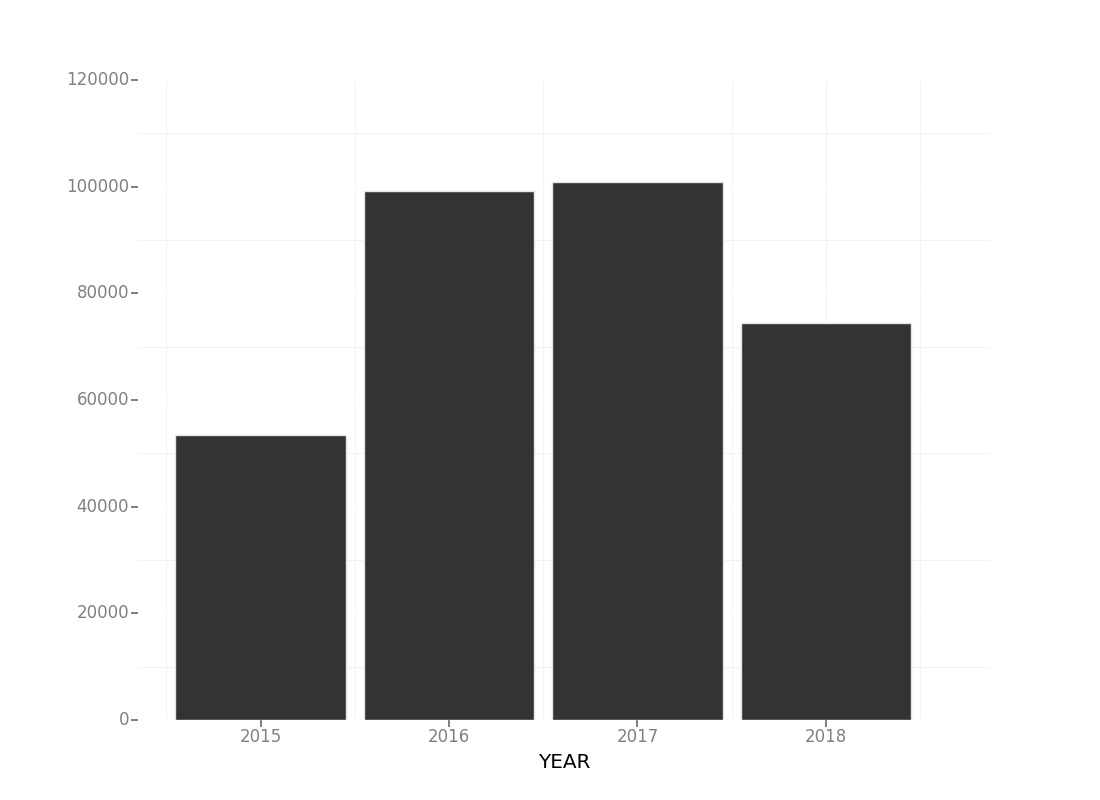

In [5]:
fig = ggplot(data, aes(x = 'YEAR'))+geom_bar()
display(fig)

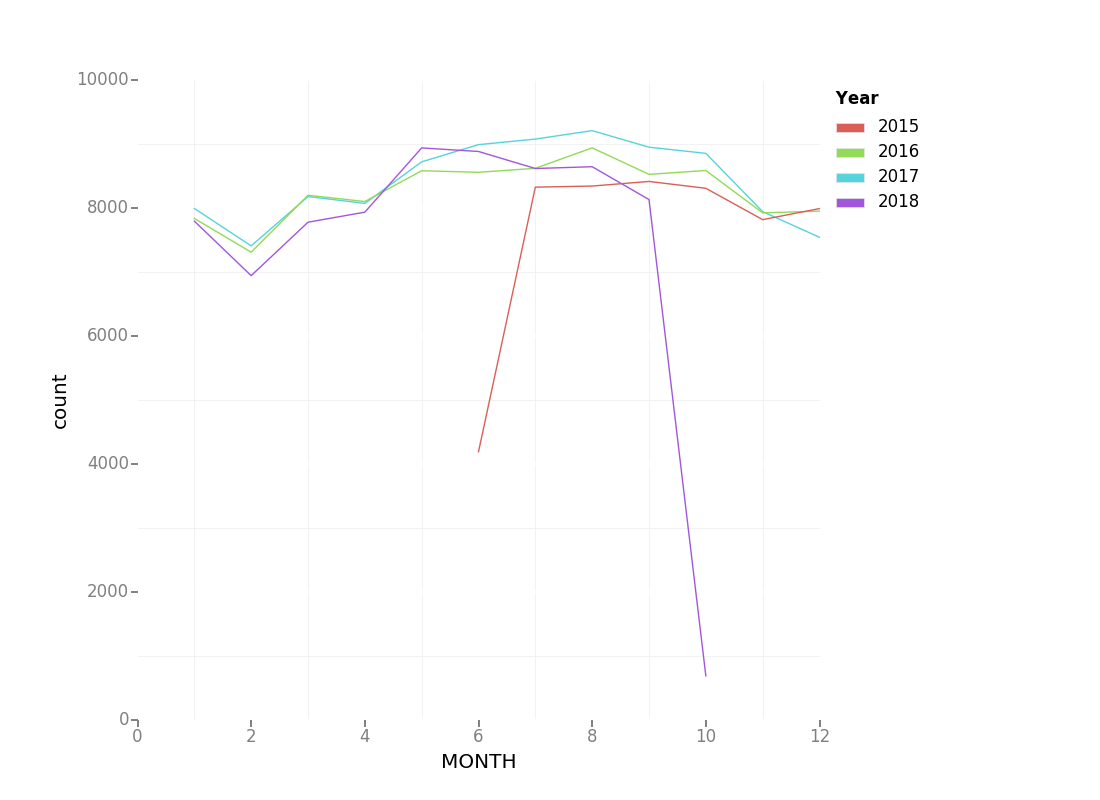

In [6]:
data2 = df.groupBy(['YEAR','MONTH']).agg(fn.count('YEAR')).withColumnRenamed('count(YEAR)', 'count').orderBy(['YEAR','MONTH'], ascending=False).toPandas()

fig = ggplot(data2, aes(x = 'MONTH', y = 'count', fill = 'YEAR', color = 'YEAR')) + geom_line()

display(fig)

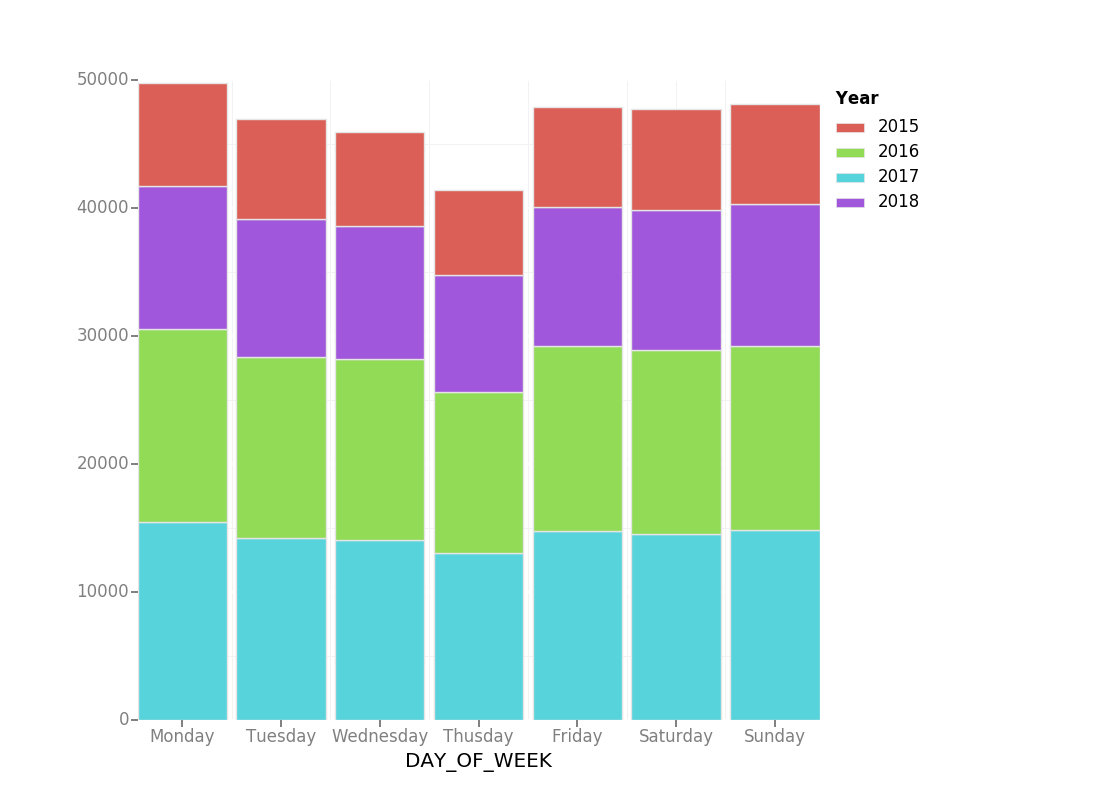

In [7]:
fig = ggplot(data, aes(x = 'DAY_OF_WEEK', fill = 'YEAR'))+geom_bar() + scale_x_continuous( labels = ['Monday','Tuesday', 'Wednesday', 'Thusday', 'Friday', 'Saturday', 'Sunday'])
display(fig)

In [8]:
list = ['Drug Violation','Simple Assault','Vandalism','Verbal Disputes', 'Medical Assistance']
data_croped = df.where(df.OFFENSE_CODE_GROUP.isin(list)).select(['DISTRICT','OFFENSE_CODE_GROUP' ])
data_croped_pd = data_croped.toPandas()
data_croped_agg = data_croped.groupBy(['OFFENSE_CODE_GROUP', 'DISTRICT']).agg(fn.count('DISTRICT')).withColumnRenamed('count(DISTRICT)', 'count')

data_district = data_croped.groupBy(['DISTRICT']).agg(fn.count('DISTRICT')).withColumnRenamed('count(DISTRICT)', 'count_DISTRICT')

data_croped_agg = data_croped_agg.join(data_district, 'DISTRICT')

data_croped_agg.head()

data_croped_agg = data_croped_agg.withColumn('fraction', fn.col('count')/fn.col('count_DISTRICT') * 100)


display(data_croped_agg)

data_croped_agg_pd = data_croped_agg.toPandas()

DISTRICT,OFFENSE_CODE_GROUP,count,count_DISTRICT,fraction
E13,Vandalism,831,4697,17.692143921652118
E18,Medical Assistance,1731,5011,34.54400319297545
A15,Vandalism,402,1680,23.92857142857143
D4,Verbal Disputes,681,9325,7.302949061662198
C11,Verbal Disputes,2698,13013,20.73311304080535
E13,Drug Violation,1123,4697,23.908878007238663
A15,Drug Violation,339,1680,20.17857142857143
C6,Medical Assistance,1956,6680,29.281437125748504
C6,Drug Violation,1871,6680,28.008982035928142
C6,Verbal Disputes,529,6680,7.919161676646707


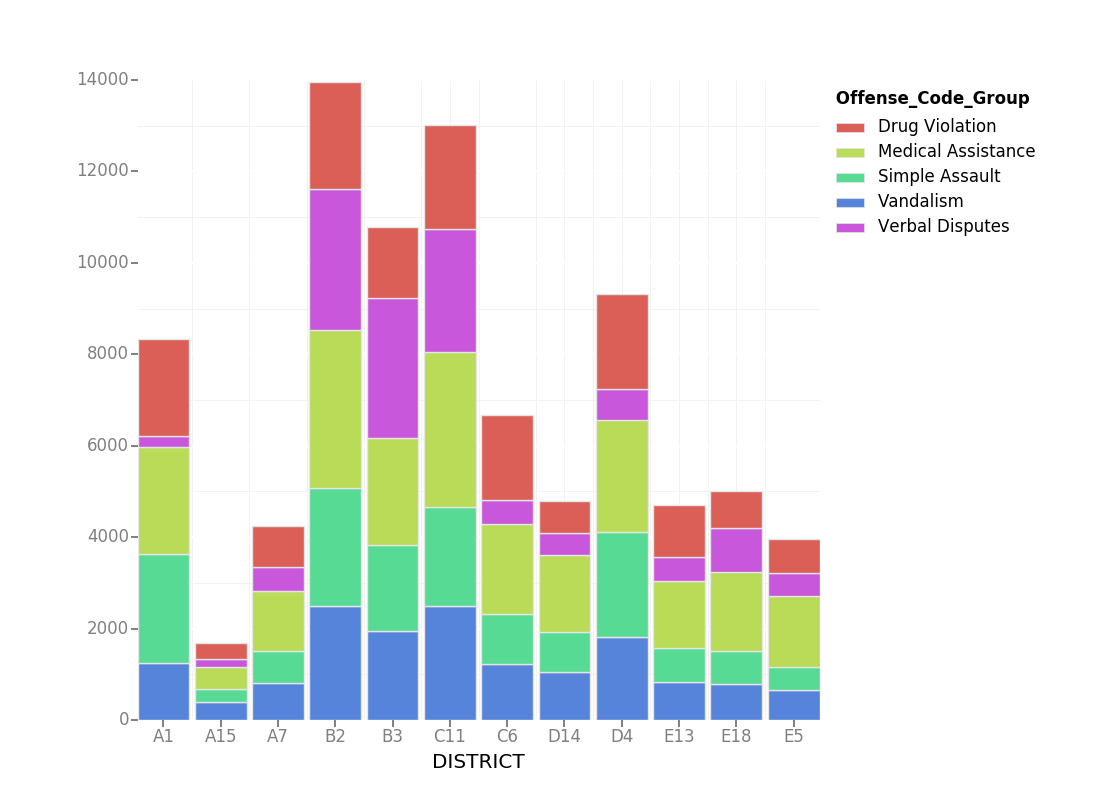

In [9]:
fig = ggplot(data_croped_pd,aes( x = 'DISTRICT', fill = 'OFFENSE_CODE_GROUP')) + geom_bar()

display(fig)

In [10]:
display(df)

INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Shoot_clean,Lat_clean,Long_clean
I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,null,2018-10-03,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121185,"(42.26260773, -71.12118637)",0,42.262608,-71.121185
I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,null,2018-08-30,2018,8,Thursday,20,Part Three,ALLSTON ST,42.35211,-71.135315,"(42.35211146, -71.13531147)",0,42.35211,-71.135315
I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,null,2018-10-03,2018,10,Wednesday,19,Part Two,DEVON ST,42.308125,-71.07693,"(42.30812619, -71.07692974)",0,42.308125,-71.07693
I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,null,2018-10-03,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359455,-71.05965,"(42.35945371, -71.05964817)",0,42.359455,-71.05965
I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,null,2018-10-03,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.37526,-71.024666,"(42.37525782, -71.02466343)",0,42.37526,-71.024666
I182080049,1402,Vandalism,VANDALISM,C11,351,null,2018-10-02,2018,10,Tuesday,20,Part Two,DORCHESTER AVE,42.2992,-71.06047,"(42.29919694, -71.06046974)",0,42.2992,-71.06047
I182080048,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,null,null,null,2018-10-03,2018,10,Wednesday,20,Part Three,null,42.320736,-71.05676,"(42.32073413, -71.05676415)",0,42.320736,-71.05676
I182080047,3301,Verbal Disputes,VERBAL DISPUTE,B2,603,null,2018-10-03,2018,10,Wednesday,19,Part Three,TREMONT ST,42.333805,-71.103775,"(42.33380683, -71.10377843)",0,42.333805,-71.103775
I182080045,802,Simple Assault,ASSAULT SIMPLE - BATTERY,E18,543,null,2018-10-03,2018,10,Wednesday,19,Part Two,AVILA RD,42.256145,-71.12803,"(42.25614494, -71.12802506)",0,42.256145,-71.12803
I182080044,3410,Towed,TOWED MOTOR VEHICLE,D4,621,null,2018-10-03,2018,10,Wednesday,20,Part Three,COMMONWEALTH AVE,42.348866,-71.08936,"(42.34886600, -71.08936284)",0,42.348866,-71.08936


In [11]:
shoots = df.where(fn.col('Shoot_clean')== 1).groupBy('OFFENSE_CODE_GROUP').agg(fn.count('OFFENSE_CODE_GROUP'))

display(shoots)

OFFENSE_CODE_GROUP,count(OFFENSE_CODE_GROUP)
Firearm Discovery,3
Recovered Stolen Property,2
Motor Vehicle Accident Response,6
Property Found,3
Warrant Arrests,78
Simple Assault,5
Drug Violation,33
Robbery,19
Missing Person Located,1
Investigate Property,15


In [12]:
offense_list = ['Aggravated Assault', 'Homicide', 'Warrant Arrests', 'Firearm Violations', 'Ballistics', 'Drug Violation', 'Search Warrants', 'Medical Assistance']
#,'Robbery', 'Vandalism', 'Investigate Property', 'Other']

df_shoots = df.where(fn.col('Shoot_clean')== 1)
df_shoots_croped = df_shoots.where(df.OFFENSE_CODE_GROUP.isin(offense_list)).toPandas()
df_shoots = df_shoots.toPandas()

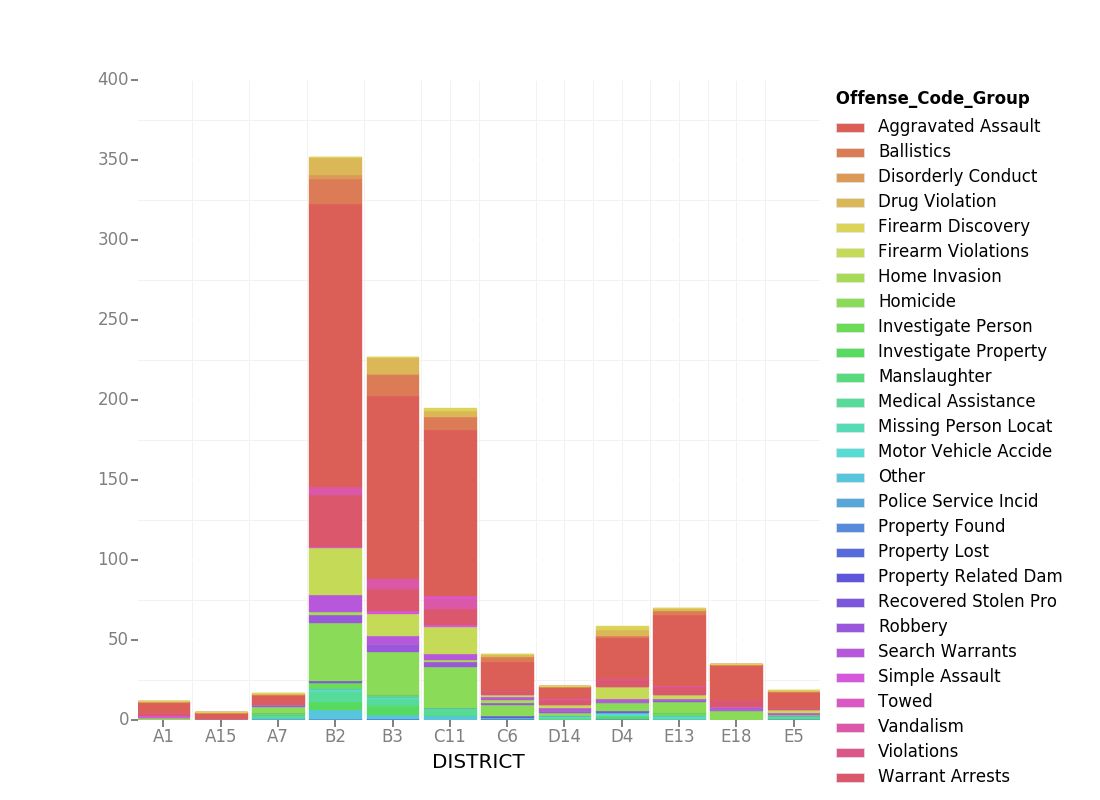

In [13]:
fig = ggplot(df_shoots, aes(x = 'DISTRICT', fill = 'OFFENSE_CODE_GROUP', color = 'OFFENSE_CODE_GROUP')) + geom_bar()

display(fig)

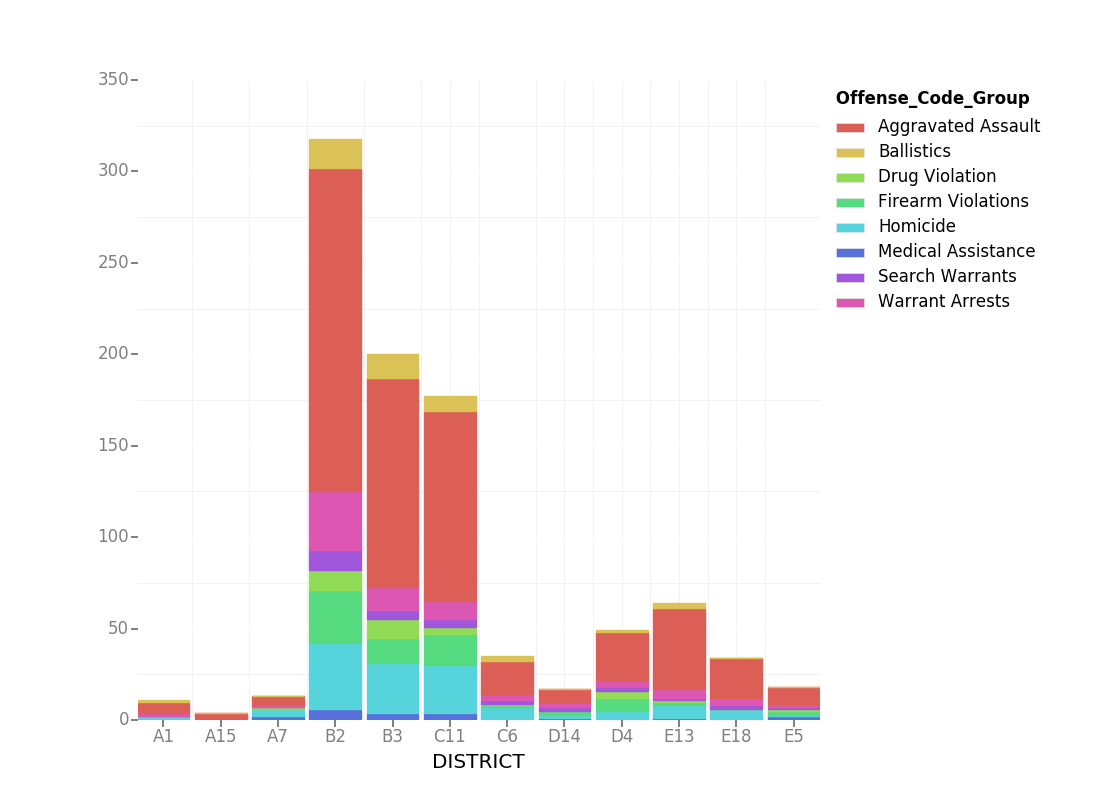

In [14]:
fig = ggplot(df_shoots_croped, aes(x = 'DISTRICT', fill = 'OFFENSE_CODE_GROUP', color = 'OFFENSE_CODE_GROUP')) + geom_bar()

display(fig)

In [15]:
import matplotlib.pyplot as plt
plt.close('all')